# Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions
made. 

In [3]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.048)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Logistic Loss

Logistic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of
membership to a given class.

In [4]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.493 (0.047)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Area Under ROC Curve

Area under ROC Curve (or ROC AUC for short) is a performance metric for binary classification
problems. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5
represents a model that is as good as random. A ROC Curve is a plot of the true positive rate
and the false positive rate for a given set of probability predictions at different thresholds used
to map the probabilities to class labels.

In [83]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.823 (0.041)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## AUC ROC more details

Assume Test set is composed of 20 patients and 3 of them are positive (infected).

<img src="https://miro.medium.com/max/1244/1*q954UftijkacI3aIVxbMfQ.png" />

Confusion Matrix for Threshold = 0.7 <br/>
<img src="https://miro.medium.com/max/1444/1*CZIQOk_W9XkzQjdy_rKMPw.png" width=300 height=300/>

In [30]:
t_p_r = 3/(3+0)
f_p_r = 4/(4+13)
print("At threshold 0.7 TPR is {} , FPR is {} ".format(t_p_r,f_p_r ))

At threshold 0.7 TPR is 1.0 , FPR is 0.23529411764705882 


Confusion Matrix for Threshold = 0.85 <br/>
<img src="https://miro.medium.com/max/1444/1*28O7ooThU-pP9E-LOoPAgg.png" width=300 height=300/>

In [31]:
t_p_r = 2/(2+1)
f_p_r = 1/(1+16)
print("At threshold 0.85 TPR is {} , FPR is {} ".format(t_p_r,f_p_r ))

At threshold 0.85 TPR is 0.6666666666666666 , FPR is 0.058823529411764705 


<img src="https://miro.medium.com/max/952/1*67UhkuZndjsRdfIEBn7sbA.png" width=300 height=300 />

<img src="https://miro.medium.com/max/1242/1*C6JOgPAdJsw2Xu_QUK3pgA.png" width=500 height=500/>

In [85]:
from sklearn.metrics import roc_curve, auc
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)
print('Predicted class labels for X_test : ', predicted)
print('Predicted probability estimates for X_test', predicted_prob)

Predicted class labels for X_test :  [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
Predicted probability estimates for X_test [[0.86999794 0.13000206]
 [0.21563825 0.78436175]
 [0.30555266 0.69444734]
 [0.75432099 0.24567901]
 [0.61546294 0.38453706]
 [0.51768513 0.482314

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [86]:
# Compute ROC curve and area the curve for logistic
fpr, tpr, thresholds = roc_curve(Y_test, predicted_prob[:, 1])
for i in range(0,len(thresholds)):
    print('At Threshold {} , the FPR is {} , the TPR is {}'.format(thresholds[i],fpr[i],tpr[i]))
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

At Threshold 1.9580132544225146 , the FPR is 0.0 , the TPR is 0.0
At Threshold 0.9580132544225146 , the FPR is 0.0 , the TPR is 0.010869565217391304
At Threshold 0.9446109118013928 , the FPR is 0.006172839506172839 , the TPR is 0.010869565217391304
At Threshold 0.8819403342645245 , the FPR is 0.006172839506172839 , the TPR is 0.05434782608695652
At Threshold 0.8755283164718938 , the FPR is 0.012345679012345678 , the TPR is 0.05434782608695652
At Threshold 0.8374989753559373 , the FPR is 0.012345679012345678 , the TPR is 0.09782608695652174
At Threshold 0.8055824002799625 , the FPR is 0.024691358024691357 , the TPR is 0.09782608695652174
At Threshold 0.7434094254822409 , the FPR is 0.024691358024691357 , the TPR is 0.22826086956521738
At Threshold 0.7379907807118861 , the FPR is 0.030864197530864196 , the TPR is 0.22826086956521738
At Threshold 0.6944473365521046 , the FPR is 0.030864197530864196 , the TPR is 0.31521739130434784
At Threshold 0.6880507360493135 , the FPR is 0.04320987654

In [89]:
len(tpr)

79

In [91]:
thresholds[77]

0.07879174637652658

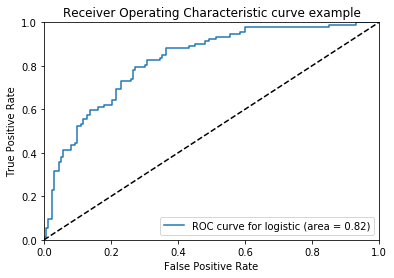

In [36]:
# Plot ROC curve
import matplotlib.pyplot as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for logistic (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver Operating Characteristic curve example')
pl.legend(loc="lower right")
pl.show()

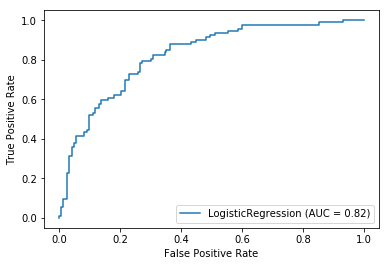

In [37]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(model, X_test, Y_test)  # doctest: +SKIP
plt.show() 

# Confusion Matrix

In [82]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.2
seed = 6
print('Shape of total features : ', X.shape)
print('Shape of total targets : ', Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
print('Shape of train features : ', X_train.shape)
print('Shape of train target : ', Y_train.shape)
print('Shape of test features : ', X_test.shape)
print('Shape of test target : ', Y_test.shape)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

Shape of total features :  (768, 8)
Shape of total targets :  (768,)
Shape of train features :  (614, 8)
Shape of train target :  (614,)
Shape of test features :  (154, 8)
Shape of test target :  (154,)
[[93 10]
 [20 31]]


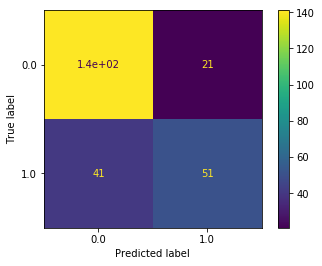

In [42]:
plot_confusion_matrix(model, X_test, Y_test)

you can see that the majority of the
predictions fall on the diagonal line of the matrix (which are correct predictions).

# Classification Report

In [92]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



In [100]:
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


In [94]:
# precision
141/(141 + 41)

0.7747252747252747

In [95]:
# recall
141/(141 + 21)

0.8703703703703703

In [97]:
2*(0.87 * 0.77)/(0.87 + 0.77)

0.8169512195121951

In [123]:
matrix.transpose(0,1).transpose(0,1)

array([[141,  21],
       [ 41,  51]])

In [168]:
rev_matrix = []
for i in reversed(matrix):
    rev_matrix.append(i[: :-1])
rev_matrix = np.array(rev_matrix)
rev_matrix

array([[ 51,  41],
       [ 21, 141]])

In [98]:
# precision
51/(51 + 21)

0.7083333333333334

In [105]:
# recall
51/(51 + 41)

0.5543478260869565

In [ ]:
y = B0 + B1*x1 + B2*x2 + B3*x3 + ...... + Bn*xn